#    Predicting COVID19 cases (Exponential function replication)

Attention: this model was implemented during mid March 2020. The data has evolved differently and the exponential model is no longer valid to predict the new cases.


In this analysis, we are trying to predict the spread of the Covid-19 with an exponential function. We visualize ex-ante the data and observe that the cases are growing at an exponential rate. For this reason, we implement an exponential prediction y =  Ae^(Bt). (All data is plotted in logarithmic scale given the different scales, to bring everthing into a similar size).

### Import lib.

In [ ]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy

### Data processing

The data processing and cleaning include: converting strings into the right format, dropping Nan values, rename columns and creating a new dataset excluding the 'China' and 'World' columns. 
We create a new data set excluding China and World data, given that at that time (March2020), China was a country having a very higher number of cases in comparison to the rest of the countries. 

We also group the total cases and total deaths, based on date and country. Once grouped, we also sort them by date and country (descending), which makes the plots easier to interpret.

In [27]:
covid = pd.read_csv('https://covid.ourworldindata.org/data/ecdc/full_data.csv')
print(covid.head())

print(covid.dtypes) #"Date" is an object, we convert it into a date format:
covid['date'] = [dt.datetime.strptime(x, '%Y-%m-%d') for x in covid['date']]

#we check if there any cell empty or null values:
print(covid.isnull().sum()) #no null values

#Rename columns
covid.columns = ['Date', 'Country', 'New Cases', 'New deaths', 'Total Cases', 'Total Deaths', 'col7', 'col8', 'col9', 'col10']

#New dataset, excluding China and World data. 
#Group by country and date, selecting total cases and total deaths.
#Sort values by each country & date - descending. (Easier to interpret plots). 

covid_except = covid.loc[~(covid['Country'].isin(['China', 'World']))] #~ means negative
covid_except = pd.DataFrame(covid_except.groupby(['Country', 'Date'])['Total Cases', 'Total Deaths'].sum()).reset_index() #Reset index because groupby by makes grouped columns indices
covid_except = covid_except.sort_values(by= ['Country', 'Date'], ascending=False)
print(covid_except)


         date     location  new_cases  new_deaths  total_cases  total_deaths  \
0  2019-12-31  Afghanistan        0.0         0.0          0.0           0.0   
1  2020-01-01  Afghanistan        0.0         0.0          0.0           0.0   
2  2020-01-02  Afghanistan        0.0         0.0          0.0           0.0   
3  2020-01-03  Afghanistan        0.0         0.0          0.0           0.0   
4  2020-01-04  Afghanistan        0.0         0.0          0.0           0.0   

   weekly_cases  weekly_deaths  biweekly_cases  biweekly_deaths  
0           NaN            NaN             NaN              NaN  
1           NaN            NaN             NaN              NaN  
2           NaN            NaN             NaN              NaN  
3           NaN            NaN             NaN              NaN  
4           NaN            NaN             NaN              NaN  
date                  0
location              0
new_cases           326
new_deaths          326
total_cases         326
tot

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


### Data visualisation

#### Bars graphs - Total cases and total deaths by country

We create two bar Plots (total cases and total deaths top 10 countries with higher number of cases). We use seaborn and certain palette.

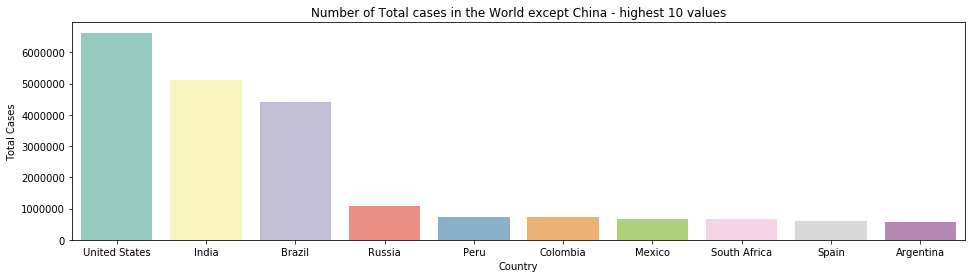

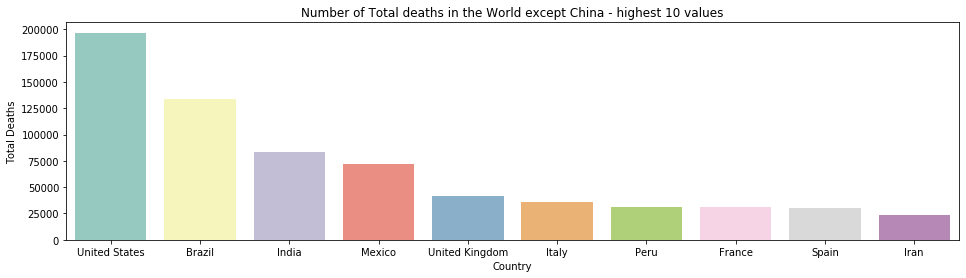

In [28]:
def plot_bar(feature, value, title, df, size):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    df = df.sort_values([value], ascending=False).reset_index(drop=True)
    g = sns.barplot(df[feature][0:10], df[value][0:10], palette='Set3')
    g.set_title("Number of {} - highest 10 values".format(title))
#   ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show()    

    
filtered_covid_except = covid_except.drop_duplicates(subset = ['Country'], keep='first')
plot_bar('Country', 'Total Cases', 'Total cases in the World except China', filtered_covid_except, size=4) #call function
plot_bar('Country', 'Total Deaths', 'Total deaths in the World except China', filtered_covid_except, size=4) #call function


####  Line plot -World aggregate total cases and total deaths

We create a line Plot we call "plot_world_aggregate", which includes the total cases and total deaths of the top 10 countries. We create a dataframe we call "covid_except_aggregate" which is the sum of the data from all countries to a given date (we groupby date).

We use seaborn.lineplot and especify which data we want in x and in y. We also create a legend, and define the color of the lines plotted. We also include a grid, and a title for the axis and for the plot itself.

In [29]:
def plot_world_aggregate(df, title='Aggregate plot', size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,2*size))
    g = sns.lineplot(x="Date", y='Total Cases', data=df, color='blue', label='Total Cases')
    g = sns.lineplot(x="Date", y='Total Deaths', data=df, color='red', label='Total Deaths')
    plt.xlabel('Date')
    plt.ylabel(f'Total {title} cases')
    plt.xticks(rotation=90)
    plt.title(f'Total {title} cases')
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()  

Here we create covid_except_aggregate df (sum information all countries for a given date).
Hence, we need to groupby dates and reset index because when you use groupby by default it changes the indexes. 

          Date  Total Cases  Total Deaths
0   2019-12-31          0.0           0.0
1   2020-01-01          0.0           0.0
2   2020-01-02          0.0           0.0
3   2020-01-03          0.0           0.0
4   2020-01-04          0.0           0.0
..         ...          ...           ...
257 2020-09-13   28715745.0      916209.0
258 2020-09-14   28988293.0      920088.0
259 2020-09-15   29230413.0      924321.0
260 2020-09-16   29533031.0      931276.0
261 2020-09-17   29197181.0      906305.0

[262 rows x 3 columns]


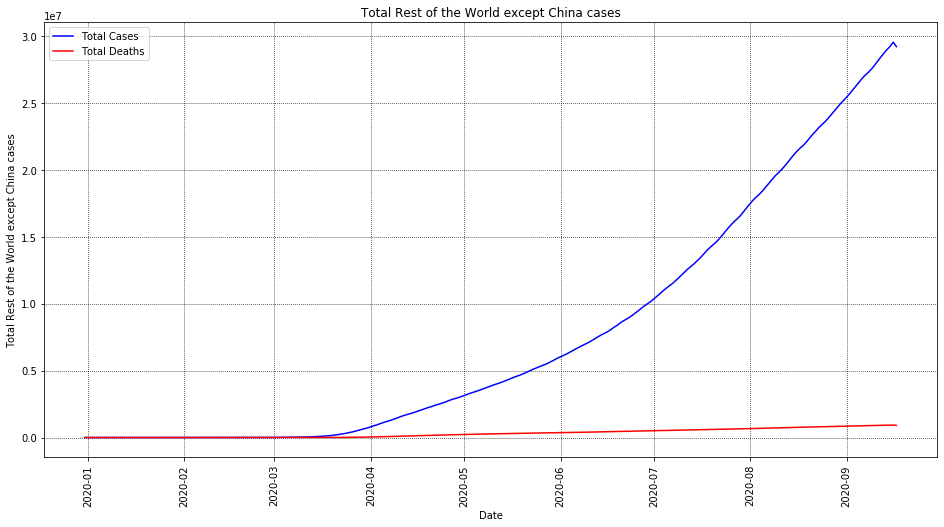

In [30]:
covid_except_aggregate = covid_except.groupby(['Date']).sum().reset_index()
print(covid_except_aggregate)

plot_world_aggregate(covid_except_aggregate, 'Rest of the World except China', size=4) #call function, especifying the df we created.

We can see again in this plot, that the total cases are increasing in whe whole World, almost in an exponential rate. Total deaths are also increasing.
(Note this is not in a log scale).

####  Line plot -Observing some countries on total cases and total deaths

We will plot the same information but for individual countries in a plot we call "plot_aggregate_countries". So we define a list of the countries we want. We only plot after 15th Feb as before that date not much happened besides China, it would result an horitzonal line. We do log scale.

In [76]:
def plot_aggregate_countries(df, countries, case_type='Total Cases', size=3, is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size, 3*size))
    for country in countries:
        df_ = df[(df['Country']==country) & (df['Date'] > '2020-02-15') & (df['Date'] < '2020-03-27')] 
        g = sns.lineplot(x="Date", y=case_type, data=df_,  label=country)  
        ax.text(max(df_['Date']), max(df_[case_type]), str(country))
    plt.xlabel('Date')
    plt.ylabel(f' {case_type} ')
    plt.title(f' {case_type} ')
    plt.xticks(rotation=90)
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()  

Here we create CVD_country_aggregate df (sum information for each countries for a given date). Again, reset index.

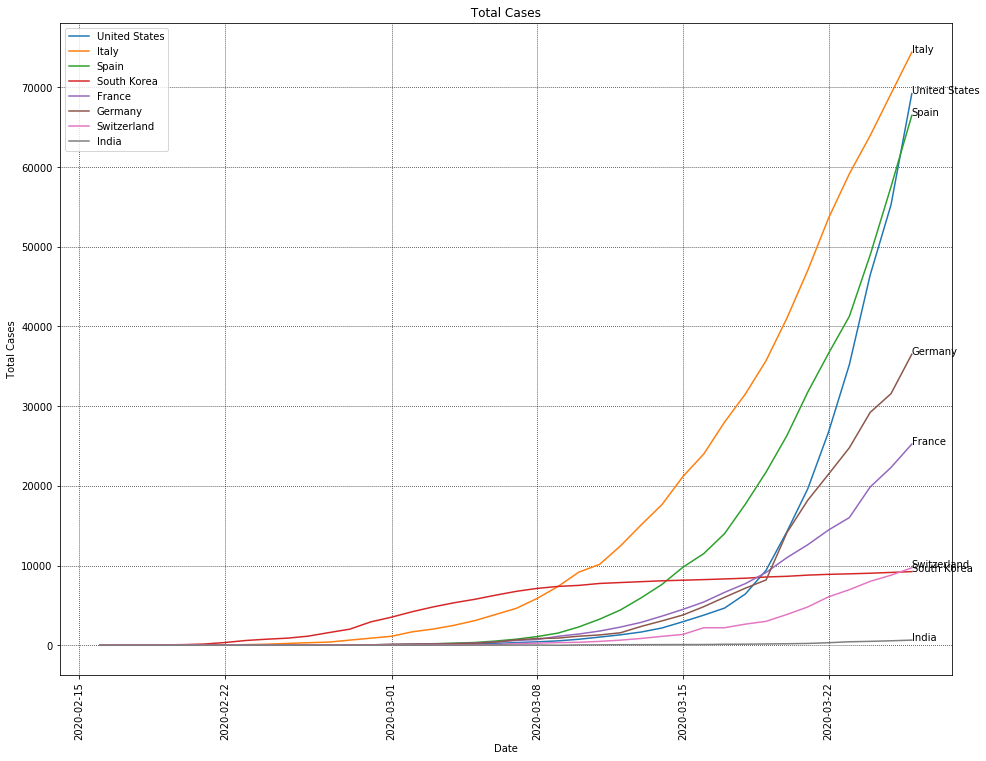

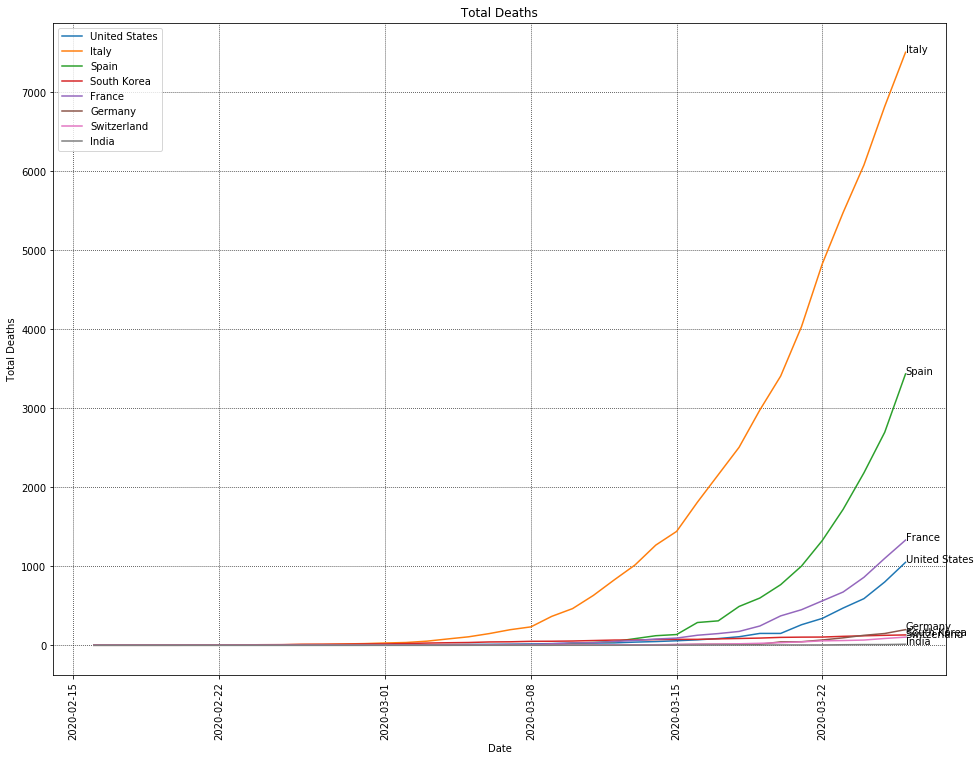

In [77]:
CVD_country_aggregate = covid_except.groupby(['Country', 'Date']).sum().reset_index()

countries = ["United States", "Italy", "Spain", "South Korea", 
                         "France", "Germany", "Switzerland", "India"]
plot_aggregate_countries(CVD_country_aggregate, countries, case_type = 'Total Cases', size=4)  #call function  

plot_aggregate_countries(CVD_country_aggregate, countries, case_type = 'Total Deaths', size=4) #call function 

In these plots, we can see how US, France and Spain are growing and Italy is already above 6000 total deaths. US is slightly above 1000.

Regarding total cases, Italy is above 70,000 and US is fastly approaching Italy given the population and density of its cities. We also see that Spain and Germany are also growing.
Comparatively, Italy is all the way up and India is in the bottom, although still growing.

In order to bring everything to the same level for total cases information, we do the Log scale of aggregate countries plot. We can see easier the trends.(we are missing some data for India during the second week of March 2020).

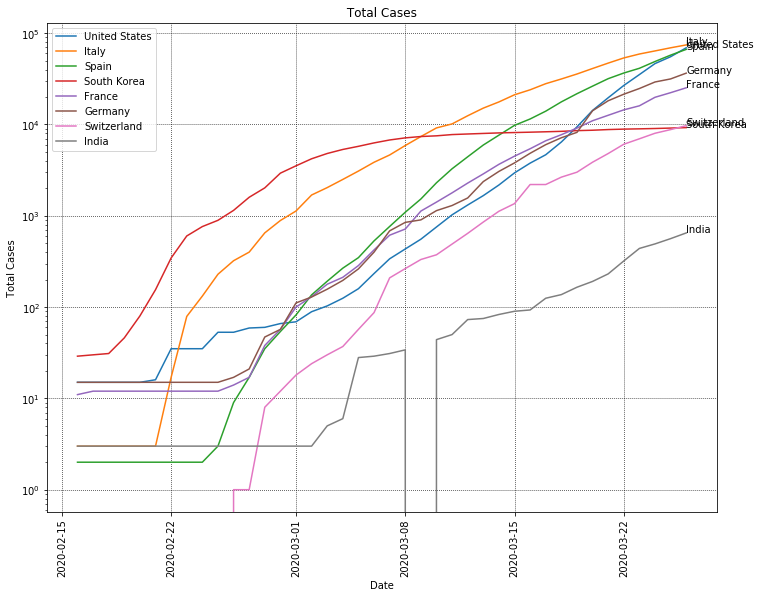

In [79]:
plot_aggregate_countries(CVD_country_aggregate, countries, case_type = 'Total Cases', size=3, is_log=True)

### Model -  total cases

We define an exponential funtion which takes three inputs (df, title, and delta).

Delta: for model validation purposes. We set that delta is the number of days prior to the dataset that we want to include.
In this case delta helps removing data points so we can make a prediction. It is more handy than creating a new traning dataset. We establish delta=5, we do not include the last 5 days of data. 

We create a plot we call "plot_exponential_fit_data". We create a df called "d_df". 

In [50]:
def plot_exponential_fit_data(d_df, title, delta):          
    d_df = d_df.sort_values(by=['Date'], ascending=True) 
    d_df['x'] = np.arrange(len(d_df)) + 1  #we add colum x to the data frame 
    d_df['y'] = d_df['Total Cases']    #we add colum y to the data frame 
    
    x = d_df['x'][:-delta]  #range of data points days, starting from the first day, excluding delta = 5 days so we can predict them)
    y = d_df['y'][:-delta] 


### Fit the data 

We define an exponential function to forecast the total covid19 cases. Function y =  Ae^(Bt). A and B are constants, t are the days, e is exponential. We will fit this function and apply non-linear least squares to fit a function, to data.
We implement the function with lib Scipy by optimising curve fit.
So we do c2 import and optimize curve and fit the function , which in this case is "lambda", exponential in scipy numpy is defined as "np.exp"in the power of b*t. (Ae^(Bt)). We provide data for x,y and t and function will give us the A and B. The initialised values for A and B (p0), we give e.g. 20 for A and 0.2 for B as B is an exponential value and it is then usually less than 1.

In [ ]:
    c2 = scipy.optimize.curve_fit(lambda t, a, b: a*np.exp(b*t),  x,  y,  p0=(20, 0.2))  #p0 are initialised values, we give it a value of 20.
 
    A, B = c2[0]  #We unwrap the c2 and obtain the A and B values. #Coefficients
    
    print(f'(y = Ae^(Bx)) A: {A}, B: {B}\n') #print our function
    x = range(1,d_df.shape[0] + 1)
    y_fit = A * np.exp(B * x) #this is the fit function

### Plot real values and fit values

In [ ]:
    #We plot the real values, training dataset.
    f, ax = plt.subplots(1,1, figsize=(12,6))
    g = sns.scatterplot(x=d_df['x'][:-delta], y=d_df['y'][:-delta], label='Confirmed cases (used for model creation)', color='red')
    g = sns.scatterplot(x=d_df['x'][-delta:], y=d_df['y'][-delta:], label='Confirmed cases (not used for model, va;idation)', color='blue') #al last 5 data points, are not used for the model, they are used for the VALIDATION.
    
    
    #We plot the fit values, predicted
    g = sns.lineplot(x=x, y=y_fit, label='Predicted values', color='green') #y_fit is the exponential function, prediction we are trying
    x_future=range(85,90)#data until 85 days (until march 24th) so we predict next 5 days, from 85-90.
    y_future=A * np.exp(B * x_future)
    print("Expected cases for the next 5 days: \n", y_future) #print the y values
    plt.xlabel('Days since first case')
    plt.ylabel(f'Total cases')
    plt.title(f'Confirmed cases & projected cases: {title}')
    plt.xticks(rotation=90)
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()

We call the function in 3 countries we pick (Italy, south korea, US). We pick those given that in Italy things were going quite bad at the moment we are analysing the data, in South Koera things were going considerably good and we also pick the US to compare.

In [ ]:
CVD_USA = covid_except[covid_except['Country']=='United States']
CVD_Italy = covid_except[covid_except['Country']=='Italy']
CVD_South_Korea = covid_except[covid_except['Country']=='South Korea']

d_df = CVD_USA.copy()
plot_exponential_fit_data(d_df, 'USA', 5)
d_df = CVD_Italy.copy()
plot_exponential_fit_data(d_df, 'Italy', 5)
d_df = CVD_South_Korea.copy()
plot_exponential_fit_data(d_df, 'South Korea', 5)

(y = Ae^(Bx)) A: 5.5028297982093145e-15, B: 0.19999999969515894

Expected cases for the next 5 days: 
 [1.32920590e-07 1.62349576e-07 1.98294219e-07 2.42197106e-07
 2.95820214e-07]


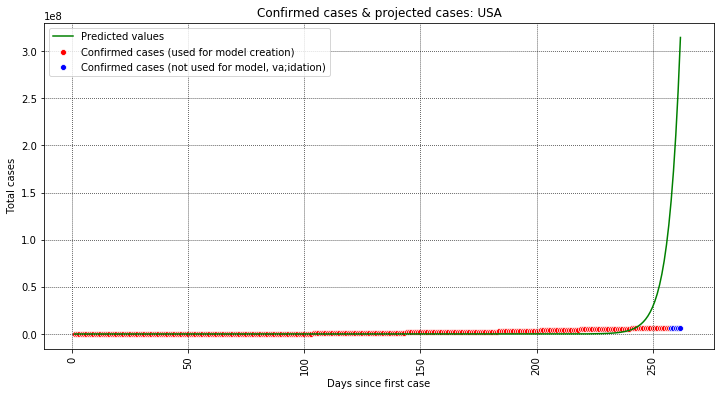

(y = Ae^(Bx)) A: 8.703510400790413e-14, B: 0.19999999946943417

Expected cases for the next 5 days: 
 [2.10232873e-06 2.56779011e-06 3.13630592e-06 3.83069270e-06
 4.67881862e-06]


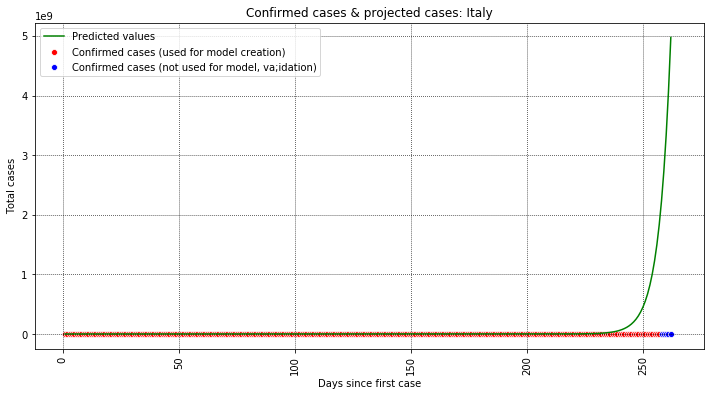

(y = Ae^(Bx)) A: 2.367320384928412e-13, B: 0.19999999907448804

Expected cases for the next 5 days: 
 [5.71825076e-06 6.98428724e-06 8.53062769e-06 1.04193322e-05
 1.27262010e-05]


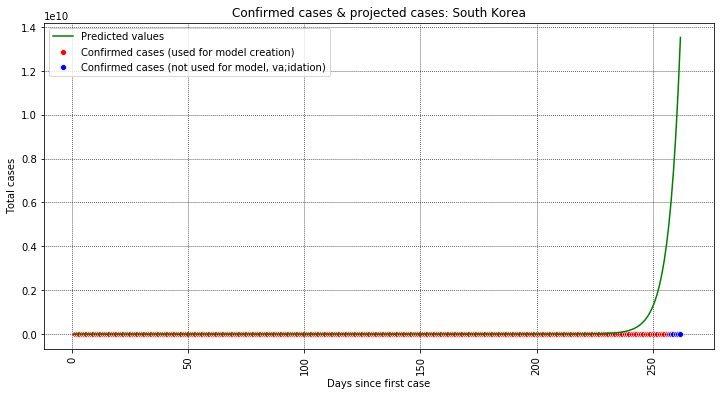

In the plots, we see the values for A and B. The dots are real data points and the curve is our model.

In the US plot, A is 5.50 and we gave an intial value of 20. And B is 0.199. These are the expected cases in the next five days. We see how the blue dots (validation) really fit the the model, which means it is growing exponentially.

For the Italy plot, we see that the last days is deviating from the exponential function which means things are going slighlty better. 

For South Korea we see that at some point things were going very fast and then it got flater. 